In [222]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [223]:
labels_2hop_all = ['T1', 'T2', 'T3', 'T4', 'T5', 'T6',
               'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10',
               'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20',
               'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30',
               'Q31', 'Q32', 'Q33', 'Q34', 'Q35', 'Q36']
labels_2hop_3 = ['T1', 'T2', 'T3', 'T4', 'T5', 'T6']
labels_2hop_4 = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10',
               'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20',
               'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30',
               'Q31', 'Q32', 'Q33', 'Q34', 'Q35', 'Q36']

labels_gr_all = ['4-1', '4-2', '4-3', '4-4', '4-5', '4-6',
                '5-1', '5-2', '5-3', '5-4', '5-5', '5-6', '5-7', '5-8', '5-9', '5-10', 
                '5-11', '5-12', '5-13', '5-14', '5-15', '5-16', '5-17', '5-18', '5-19', '5-20', '5-21']
labels_gr_4 = ['4-1', '4-2', '4-3', '4-4', '4-5', '4-6']
labels_gr_5 = ['5-1', '5-2', '5-3', '5-4', '5-5', '5-6', '5-7', '5-8', '5-9', '5-10', 
               '5-11', '5-12', '5-13', '5-14', '5-15', '5-16', '5-17', '5-18', '5-19', '5-20', '5-21']


In [224]:
def load_json_convert(filepath):
    with open(f'./{filepath}/output.json') as f:
        real = json.load(f)

    with open(f'./{filepath}/random_output.json') as f:
        random = json.load(f)
    
    real = pd.DataFrame(real)
    real['domain'] = real['dataset'].str.split('-').str[0]
    random = pd.DataFrame(random)
    random['domain'] = random['dataset'].str.split('-').str[0]
    
    return real, random

In [238]:
def sig_profile(real, random, label, datasets, domain = "all"):
        
    # Prepare for plotting
    plt.figure(figsize=(10, 8))

    srp_data = []
    
    if domain != "all":
        real = real[real['domain'] == domain]
        random = random[random['domain'] == domain]
            
    for data in datasets:
        print(data)
        real_data = real[real['dataset'] == data][label]
        random_data = random[random['dataset'] == data][label]

        # Compute Delta_i for each subgraph
        epsilon = 1
        delta_i = {}
        for key in list(real_data):
            N_real_i = real_data[key].values
            N_rand_i = random_data[key].values
            delta_i[key] = (N_real_i - N_rand_i) / (N_real_i + N_rand_i + epsilon)

        # Normalize Delta_i to get SRP_i
        sum_delta_squared = sum([delta**2 for delta in delta_i.values()])
        srp_i = [delta / np.sqrt(sum_delta_squared) for delta in delta_i.values()]

        srp_data.append(srp_i)

        # Plot the Subgraph Ratio Profile
        plt.plot(label, srp_i, marker='o', label=f'{data}')

    if domain == "all":
        df = pd.DataFrame(srp_data, index = datasets).T
        correlation_matrix = df.corr(method='pearson')
    else:
        correlation_matrix = None

    # Plot settings
    plt.xlabel('2Hoplets Index')
    plt.ylabel('Normalized Significance Profile Score')
    plt.title(f'{domain} datasets')
    plt.ylim(-0.5, 0.5)
    plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
    plt.legend()
    plt.xticks(rotation=45)

    # num_labels_to_show = 8
    # step = len(labels) // (num_labels_to_show - 1)
    # visible_positions = list(range(0, len(labels), step))[:num_labels_to_show]
    # visible_labels = [labels[i] for i in visible_positions]
    # plt.xticks(visible_positions, visible_labels)


    # Save the plot
    # filename = f'{domain}_extend_3.png'
    # plt.savefig(f'./figure/{filename}')

    # Display the plot
    plt.show()
    return correlation_matrix, srp_data

In [395]:
def conf_mat(labels, correlation_matrix):
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=False, fmt=".2f", cmap='YlOrBr', cbar=True, square=True, vmin=-0.2, vmax=1)
    # Add custom colored labels
    ax = plt.gca()
    ax.set_xticks(np.arange(len(labels)) + 0.5)
    ax.set_yticks(np.arange(len(labels)) + 0.5)
    ax.set_xticklabels(labels, rotation=90, ha='right', rotation_mode='anchor')
    ax.set_yticklabels(labels, rotation=0)
    #ax.set_xticklabels([''] * len(labels))
    #ax.set_yticklabels([''] * len(labels))
    plt.show()

### For Each Domain

In [227]:
datasets = [
            'ca-dblp-2012', 'ca-CondMat', 'ca-HepTh', #'ca-dblp-2012',
            'web-arabic-2005', 'web-indochina-2004', 'web-sk-2005', 'web-webbase', 'web-polblogs',  'web-EPA',  'web-edu',  'web-NotreDame',
            #'email-univ','email-Enron', #'email-EU',
            'socfb-Haverford76', 'socfb-Hamilton46', 'socfb-Middlebury45', #'socfb-UC64', 'socfb-UCSC68',
            'tags-ask-ubuntu', 'tags-math-sx',
            'roadNet-CA', 'roadNet-TX', 'roadNet-PA',
            ]
real, random = load_json_convert("original_output")

In [228]:
domain = real[real['dataset'] == 'datasets']['domain']
#corr = sig_profile(real, random, labels_2hop_4, datasets, domain='ca')

ca-dblp-2012
ca-CondMat
ca-HepTh
web-arabic-2005
web-indochina-2004
web-sk-2005
web-webbase
web-polblogs
web-EPA
web-edu
web-NotreDame
socfb-Haverford76
socfb-Hamilton46
socfb-Middlebury45
tags-ask-ubuntu
tags-math-sx
roadNet-CA
roadNet-TX
roadNet-PA


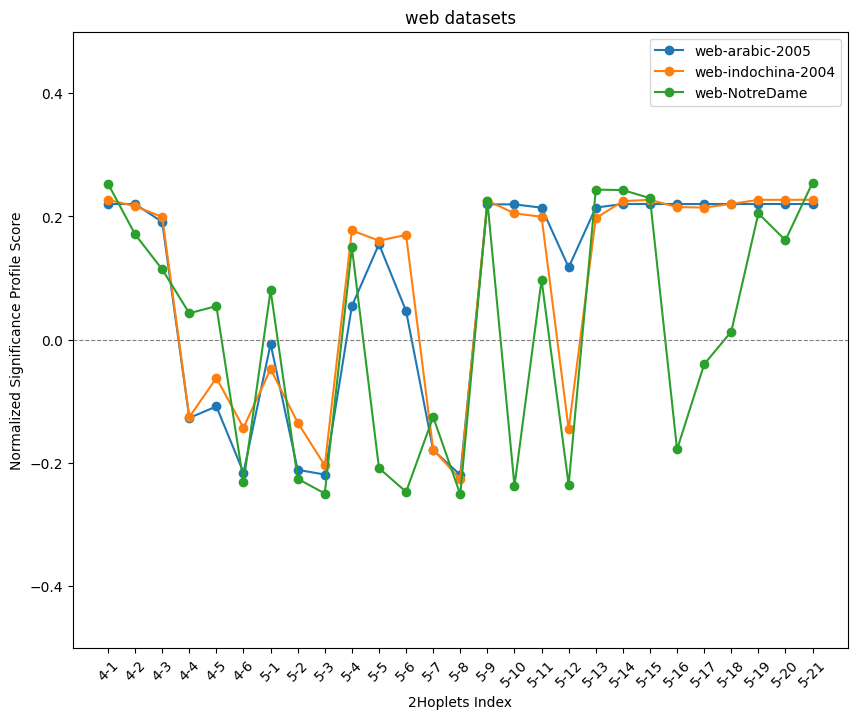

In [229]:
corr = sig_profile(real, random, labels_gr_all, datasets, domain='web')

In [230]:
corr = sig_profile(real, random, labels_2hop_all, datasets, domain='socfb')

ca-dblp-2012


KeyError: "None of [Index(['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6',\n       'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16',\n       'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26',\n       'Q27', 'Q28', 'Q29', 'Q30', 'Q31', 'Q32', 'Q33', 'Q34', 'Q35', 'Q36'],\n      dtype='object')] are in the [columns]"

<Figure size 1000x800 with 0 Axes>

### Total

ca-HepPh
ca-AstroPh
ca-GrQc
socfb-Middlebury45
socfb-Hamilton46
socfb-Haverford76
tags-ask-ubuntu
tags-math-sx
web-webbase
web-italycnr-2000
roadNet-CA
roadNet-TX
roadNet-PA


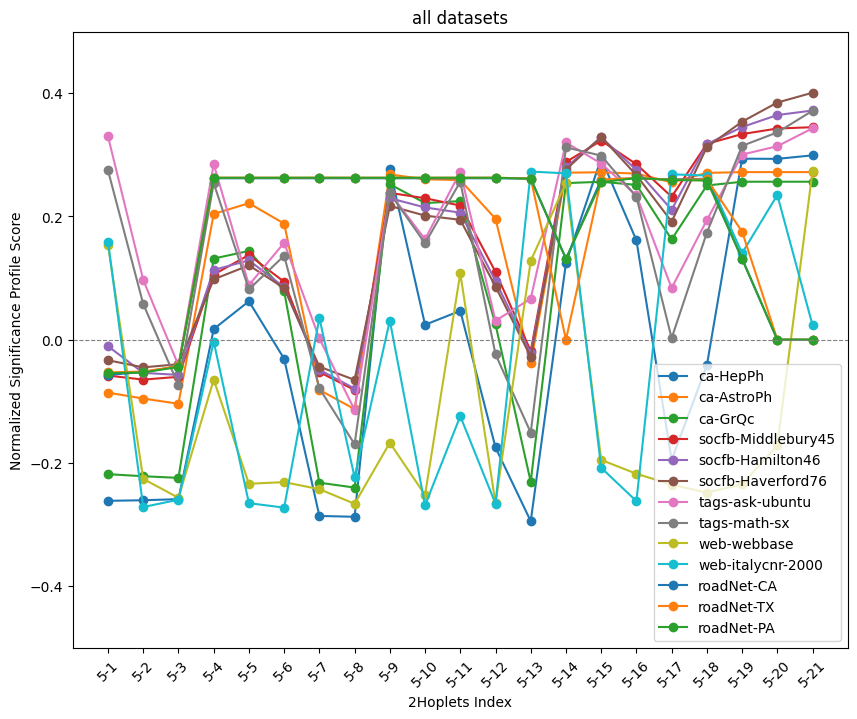

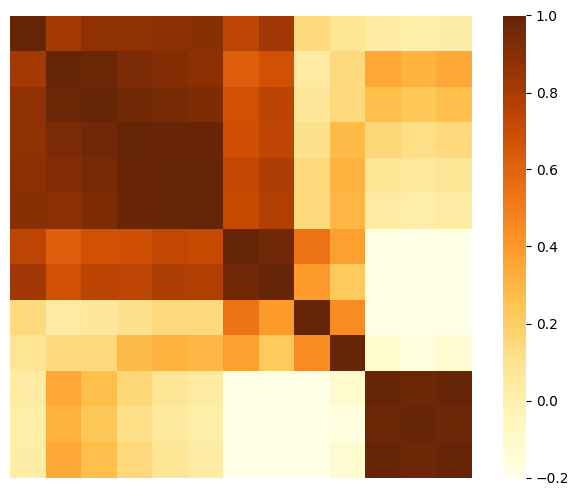

In [496]:
datasets = [
            'ca-HepPh', 'ca-AstroPh', 'ca-GrQc',  #'ca-netscience',  #'ca-Erdos992', 
            #'ca-dblp-2012', 'ca-HepTh', #'ca-CondMat',
            
            #'socfb-UC64', 'socfb-UCSC68',
            #'ca-Erdos992',  'ca-dblp-2012', 'ca-MathSciNet', 'ca-HepTh''ca-CondMat', 
            
            #'web-NotreDame', 'web-Stanford',
            'socfb-Middlebury45', 'socfb-Hamilton46', 'socfb-Haverford76', 
            'tags-ask-ubuntu', 'tags-math-sx',
            
            'web-webbase', 'web-italycnr-2000', #'web-sk-2005', 'web-arabic-2005',  'web-indochina-2004',  #'web-edu', 'web-EPA', 'web-polblogs', 
            'roadNet-CA', 'roadNet-TX', 'roadNet-PA', 
            #'email-univ','email-Enron', #'email-EU',       
            
            
            ]
real, random = load_json_convert("original_output")
domain = real[real['dataset'] == 'datasets']['domain']
corr_mat, srp = sig_profile(real, random, labels_gr_5, datasets)
conf_mat(domain, corr_mat)

In [486]:
corr_mat

,ca-HepPh,ca-AstroPh,ca-GrQc,ca-netscience,web-polblogs,web-webbase,web-sk-2005,web-arabic-2005,socfb-Middlebury45,socfb-Hamilton46,socfb-Haverford76,tags-ask-ubuntu,tags-math-sx,roadNet-CA,roadNet-TX,roadNet-PA
ca-HepPh,1.000000,0.945907,0.937952,0.886232,0.734246,0.418301,0.702933,0.844160,0.593483,0.458707,0.379066,0.570717,0.721250,0.377554,0.376538,0.374879
ca-AstroPh,0.945907,1.000000,0.954805,0.903714,0.751600,0.422729,0.827499,0.885672,0.478981,0.327191,0.229065,0.664466,0.781497,0.434098,0.433351,0.432271
ca-GrQc,0.937952,0.954805,1.000000,0.962644,0.703216,0.411458,0.842929,0.956808,0.396124,0.250403,0.171465,0.658641,0.741291,0.460280,0.459589,0.458363
ca-netscience,0.886232,0.903714,0.962644,1.000000,0.732104,0.526510,0.837490,0.945527,0.270639,0.131206,0.051895,0.732023,0.797282,0.411104,0.410785,0.409942
web-polblogs,0.734246,0.751600,0.703216,0.732104,1.000000,0.808287,0.691196,0.740088,0.228402,0.083872,-0.003243,0.817781,0.836893,0.198153,0.197826,0.197430
web-webbase,0.418301,0.422729,0.411458,0.526510,0.808287,1.000000,0.512121,0.494415,-0.044575,-0.154666,-0.216858,0.760187,0.685922,0.082657,0.082960,0.082514
web-sk-2005,0.702933,0.827499,0.842929,0.837490,0.691196,0.512121,1.000000,0.866302,0.047557,-0.114479,-0.190080,0.751497,0.710968,0.575855,0.575952,0.575683
web-arabic-2005,0.844160,0.885672,0.956808,0.945527,0.740088,0.494415,0.866302,1.000000,0.253527,0.105121,0.029860,0.698735,0.722476,0.405867,0.405821,0.405082
socfb-Middlebury45,0.593483,0.478981,0.396124,0.270639,0.228402,-0.044575,0.047557,0.253527,1.000000,0.981504,0.954318,-0.185694,0.091391,0.042304,0.040481,0.038338
socfb-Hamilton46,0.458707,0.327191,0.250403,0.131206,0.083872,-0.154666,-0.114479,0.105121,0.981504,1.000000,0.986890,-0.328055,-0.048153,-0.043719,-0.045581,-0.047722


In [424]:
def calculate_average_correlations(correlation_matrix, domain_indices):
    domain_intra_corr = {}
    domain_inter_corr = {}
    intra_domain_corr = []
    inter_domain_corr = []

    for domain1, indices1 in domain_indices.items():
        for domain2, indices2 in domain_indices.items():
            corrs = correlation_matrix.loc[indices1, indices2].values.flatten()
            if domain1 == domain2:
                corrs = [corr for corr in corrs if corr != 1.0]
                mean_corr = np.mean(corrs)
                domain_intra_corr[(domain1, domain2)] = mean_corr
                intra_domain_corr.extend(corrs)
            else:
                mean_corr = np.mean(corrs)
                domain_inter_corr[(domain1, domain2)] = mean_corr
                inter_domain_corr.extend(corrs)

    average_intra_domain_corr = np.mean(intra_domain_corr) 
    average_inter_domain_corr = np.mean(inter_domain_corr)

    return domain_intra_corr, domain_inter_corr, average_intra_domain_corr, average_inter_domain_corr

# 도메인 별 유사도 계산
domains_indices = {
    'ca': ['ca-CondMat','ca-HepTh', 'ca-dblp-2012'],
    #'ca': ['ca-HepPh','ca-AstroPh', 'ca-GrQc', 'ca-netscience'],
    'web' : ['web-arabic-2005', 'web-indochina-2004'],
    'socfb' : ['socfb-Haverford76', 'socfb-Hamilton46', 'socfb-Middlebury45'],
    'tags': ['tags-ask-ubuntu', 'tags-math-sx'],
    'roadNet' : ['roadNet-CA', 'roadNet-TX', 'roadNet-PA']
}

domain_intra_corr, domain_inter_corr, average_intra_domain_corr, average_inter_domain_corr = calculate_average_correlations(corr_mat, domains_indices)

# 도메인 별 유사도 출력
print("Domain intra-correlations:")
for domains, corr in domain_intra_corr.items():
    print(f'{domains}: {corr:.4f}')

print("\nDomain inter-correlations:")
for domains, corr in domain_inter_corr.items():
    print(f'{domains}: {corr:.4f}')

# 평균 intra-domain 및 inter-domain 유사도 출력
print(f'\nAverage intra-domain correlation: {average_intra_domain_corr:.4f}')
print(f'Average inter-domain correlation: {average_inter_domain_corr:.4f}')

Domain intra-correlations:
('ca', 'ca'): 0.9545
('web', 'web'): 0.9071
('socfb', 'socfb'): 0.9929
('tags', 'tags'): 0.9640
('roadNet', 'roadNet'): 0.9817

Domain inter-correlations:
('ca', 'web'): 0.8001
('ca', 'socfb'): 0.7370
('ca', 'tags'): 0.3771
('ca', 'roadNet'): 0.6132
('web', 'ca'): 0.8001
('web', 'socfb'): 0.8173
('web', 'tags'): 0.6501
('web', 'roadNet'): 0.2874
('socfb', 'ca'): 0.7370
('socfb', 'web'): 0.8173
('socfb', 'tags'): 0.7382
('socfb', 'roadNet'): 0.0840
('tags', 'ca'): 0.3771
('tags', 'web'): 0.6501
('tags', 'socfb'): 0.7382
('tags', 'roadNet'): -0.2419
('roadNet', 'ca'): 0.6132
('roadNet', 'web'): 0.2874
('roadNet', 'socfb'): 0.0840
('roadNet', 'tags'): -0.2419

Average intra-domain correlation: 0.9689
Average inter-domain correlation: 0.4802


### PCA

In [ ]:
import numpy as np

X = np.array(srp)
X = X.reshape(10, 36).T

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# X는 n개의 샘플과 36차원의 벡터로 이루어진 데이터
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# PCA 모델을 주성분 개수를 지정하여 생성
pca = PCA(n_components=10)  # 예: 2개의 주성분으로 차원을 축소
X_pca = pca.fit_transform(X_scaled)

print(pca.explained_variance_ratio_)  # 각 주성분이 설명하는 분산 비율
# 각 주성분이 원본 데이터의 몇 번째 차원에 해당하는지 확인
most_influential_dimensions = np.argmax(np.abs(pca.components_), axis=1)

# 출력
for i, dim in enumerate(most_influential_dimensions):
    print(f"주성분 {i + 1}은(는) 원래 데이터의 {dim + 1}번째 차원에 가장 큰 영향을 받음")
    
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Result')
plt.show()


ValueError: Found array with dim 3. StandardScaler expected <= 2.

### Spectral Clustering 

In [293]:
def cp_nonplot(real, random, label, datasets, domain = "all"):

    srp_data = []
    
    if domain != "all":
        real = real[real['domain'] == domain]
        random = random[random['domain'] == domain]
            
    for data in datasets:
        real_data = real[real['dataset'] == data][label]
        random_data = random[random['dataset'] == data][label]

        # Compute Delta_i for each subgraph
        epsilon = 1
        delta_i = {}
        for key in list(real_data):
            N_real_i = real_data[key].values
            N_rand_i = random_data[key].values
            delta_i[key] = (N_real_i - N_rand_i) / (N_real_i + N_rand_i + epsilon)

        # Normalize Delta_i to get SRP_i
        sum_delta_squared = sum([delta**2 for delta in delta_i.values()])
        srp_i = [delta / np.sqrt(sum_delta_squared) for delta in delta_i.values()]

        srp_data.append(srp_i)

        
    if domain == "all":
        df = pd.DataFrame(srp_data, index = datasets).T
        correlation_matrix = df.corr(method='pearson')
    else:
        correlation_matrix = None

    return correlation_matrix, srp_data

In [437]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import normalize, MinMaxScaler
from scipy.sparse.linalg import eigsh
from sklearn.metrics import accuracy_score, adjusted_rand_score, normalized_mutual_info_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.manifold import SpectralEmbedding
from sklearn.metrics import f1_score, normalized_mutual_info_score, accuracy_score



def spectral_clustering(similarity_matrix, num_clusters):
    # Step 1: Construct the Degree matrix
    degree_matrix = np.diag(similarity_matrix.sum(axis=1))
    
    # Step 2: Compute the unnormalized Laplacian
    D_inv_sqrt = np.diag(1.0 / np.sqrt(degree_matrix.diagonal()))
    laplacian_matrix = np.eye(degree_matrix.shape[0]) - D_inv_sqrt @ similarity_matrix @ D_inv_sqrt
    
    # Step 3: Compute the first k eigenvectors
    eigvals, eigvecs = eigsh(laplacian_matrix, k=num_clusters, which='SM')  # 'SM' stands for smallest magnitude

    # Step 4: Normalize the rows of the eigenvector matrix
    normalized_eigvecs = normalize(eigvecs)

    # Step 5: Apply k-means clustering on the rows of normalized_eigvecs
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    kmeans.fit(normalized_eigvecs)
    
    # Get the cluster labels
    labels = kmeans.labels_
    return labels, normalized_eigvecs

In [444]:
def final_spec(datasets, true_labels, file, label, nc = 4):
    if file == "ex":
        file_path = "extend_output"
    else :
        file_path = "original_output"
        
    real, random = load_json_convert(file_path)
    domain = real[real['dataset'] == 'datasets']['domain']
    corr_mat, srp = cp_nonplot(real, random, label, datasets)
    #similarity_matrix = np.array(corr_mat.values)
    min_val = np.min(corr_mat)
    max_val = np.max(corr_mat)
    similarity_matrix = (corr_mat.values - min_val) / (max_val - min_val)
    np.fill_diagonal(similarity_matrix, 0)

    num_clusters = nc
    cluster_labels, feature_vectors = spectral_clustering(similarity_matrix, num_clusters)

    # Display the resulting cluster labels
    #print("Cluster labels for each dataset:")
    cluster_results = pd.DataFrame({"Dataset": corr_mat.index, "Cluster": cluster_labels})
    #print(cluster_results)

    
    # Calculate ARI
    ari = adjusted_rand_score(true_labels, cluster_labels)
    print(f"Adjusted Rand Index (ARI): {ari:.3f}")

    # Normalized Mutual Information (NMI)
    nmi = normalized_mutual_info_score(labels_true=true_labels, labels_pred=cluster_labels)
    print(f"Normalized Mutual Information (NMI): {nmi:.3f}")
    
    # Calculate Silhouette Score (requires the feature vectors from spectral clustering and predicted labels)
    silhouette_avg = silhouette_score(feature_vectors, cluster_labels)
    print(f"Silhouette Score: {silhouette_avg:.3f}")
    
    print("===" * 10)

    # Visualize the clustering results using PCA
    # pca = PCA(n_components=4)
    # pca_result = pca.fit_transform(feature_vectors)

    # plt.figure(figsize=(10, 6))
    # for i in range(num_clusters):
    #     plt.scatter(pca_result[cluster_labels == i, 0], pca_result[cluster_labels == i, 1], label=f"Cluster {i+1}")

    # plt.title('Spectral Clustering Results (PCA 2D Projection)')
    # plt.xlabel('PCA Component 1')
    # plt.ylabel('PCA Component 2')
    # plt.legend()
    # plt.show()

In [445]:
# first datasets 
datasets = [
            'ca-HepPh', 'ca-GrQc', 'ca-netscience', 'ca-AstroPh',
            'socfb-Middlebury45', 'socfb-Hamilton46', 'socfb-Haverford76', 
            'tags-ask-ubuntu', 'tags-math-sx',
            'roadNet-CA', 'roadNet-TX', 'roadNet-PA', 
            ]
true_labels = [0, 0, 0, 0, 1, 1, 1, 2, 2, 3, 3, 3] 
final_spec(datasets, true_labels, "ex", labels_2hop_3)
final_spec(datasets, true_labels, "ex", labels_2hop_4)
final_spec(datasets, true_labels, "ex", labels_2hop_all)
final_spec(datasets, true_labels, "or", labels_gr_4)
final_spec(datasets, true_labels, "or", labels_gr_5)
final_spec(datasets, true_labels, "or", labels_gr_all)

Adjusted Rand Index (ARI): 0.617
Normalized Mutual Information (NMI): 0.830
Silhouette Score: 0.561
Adjusted Rand Index (ARI): 1.000
Normalized Mutual Information (NMI): 1.000
Silhouette Score: 0.825
Adjusted Rand Index (ARI): 1.000
Normalized Mutual Information (NMI): 1.000
Silhouette Score: 0.821
Adjusted Rand Index (ARI): 0.617
Normalized Mutual Information (NMI): 0.830
Silhouette Score: 0.682
Adjusted Rand Index (ARI): 0.521
Normalized Mutual Information (NMI): 0.745
Silhouette Score: 0.581
Adjusted Rand Index (ARI): 0.521
Normalized Mutual Information (NMI): 0.745
Silhouette Score: 0.702


In [455]:
# second datasets 
datasets = [
            'ca-CondMat', 'ca-HepTh', 'ca-dblp-2012',
            'web-arabic-2005', 'web-indochina-2004',
            'socfb-Middlebury45', 'socfb-Hamilton46', 'socfb-Haverford76', 
            'tags-ask-ubuntu', 'tags-math-sx',
            'roadNet-CA', 'roadNet-TX', 'roadNet-PA'
            ]
true_labels = [0, 0, 0, 1, 1, 2, 2, 2, 3, 3, 4, 4, 4] 
final_spec(datasets, true_labels, "ex", labels_2hop_3, nc = 5)
final_spec(datasets, true_labels, "ex", labels_2hop_4, nc = 5)
final_spec(datasets, true_labels, "ex", labels_2hop_all, nc = 5)
final_spec(datasets, true_labels, "or", labels_gr_4, nc = 5)
final_spec(datasets, true_labels, "or", labels_gr_5, nc = 5)
final_spec(datasets, true_labels, "or", labels_gr_all, nc = 5)

Adjusted Rand Index (ARI): 0.594
Normalized Mutual Information (NMI): 0.856
Silhouette Score: 0.627
Adjusted Rand Index (ARI): 1.000
Normalized Mutual Information (NMI): 1.000
Silhouette Score: 0.835
Adjusted Rand Index (ARI): 1.000
Normalized Mutual Information (NMI): 1.000
Silhouette Score: 0.835
Adjusted Rand Index (ARI): 0.541
Normalized Mutual Information (NMI): 0.798
Silhouette Score: 0.575
Adjusted Rand Index (ARI): 1.000
Normalized Mutual Information (NMI): 1.000
Silhouette Score: 0.765
Adjusted Rand Index (ARI): 1.000
Normalized Mutual Information (NMI): 1.000
Silhouette Score: 0.732


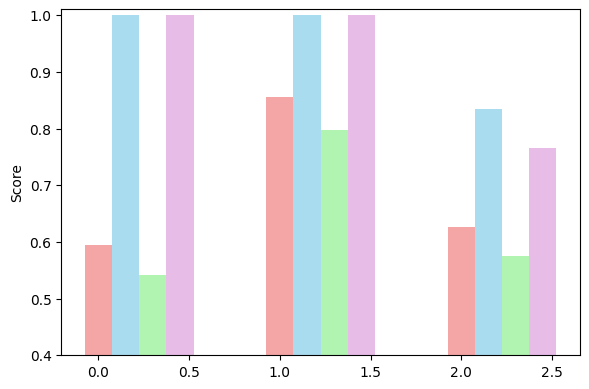

In [456]:
# 데이터 설정
metrics_labels = ['ARI', 'NMI', 'Silhouette']
metrics = ['2hop-3', '2hop-4', '1hop-4', '1hop-5']
ari_scores = [0.594, 1.000, 0.541, 1.000]
nmi_scores = [0.856, 1.000, 0.798, 1.000]
silhouette_scores = [0.627, 0.835, 0.575, 0.765]

# 각 성능 지표를 위한 score array를 생성
scores = [ari_scores, nmi_scores, silhouette_scores]
scores = np.array(scores)  # (3, 6) 형태

# 색상 설정
colors = ['lightcoral', 'skyblue', 'lightgreen', 'plum', 'mediumseagreen', 'cornflowerblue']

# 막대 그래프 그리기
fig, ax = plt.subplots(figsize=(6, 4))

bar_width = 0.15
x = np.arange(len(metrics_labels))

# 각 metric 별로 막대를 그리기
for i in range(len(metrics)):
    ax.bar(x + i * bar_width, scores[:, i], width=bar_width, label=metrics[i], color=colors[i], alpha=0.7)

# 레이블 및 제목 설정
ax.set_ylabel('Score')
ax.set_ylim(0.4, 1.01)

plt.tight_layout()
plt.show()


In [ ]:
# first datasets 
datasets = [
            'ca-HepPh', 'ca-GrQc', 'ca-netscience', 'ca-AstroPh',
            'socfb-Middlebury45', 'socfb-Hamilton46', 'socfb-Haverford76', 
            'tags-ask-ubuntu', 'tags-math-sx',
            'roadNet-CA', 'roadNet-TX', 'roadNet-PA', 
            ]
true_labels = [0, 0, 0, 0, 1, 1, 1, 2, 2, 3, 3, 3] 

real, random = load_json_convert("extend_output")
domain = real[real['dataset'] == 'datasets']['domain']
corr_mat, srp = cp_nonplot(real, random, labels_2hop_4, datasets)
#similarity_matrix = np.array(corr_mat.values)
min_val = np.min(corr_mat)
max_val = np.max(corr_mat)
similarity_matrix = (corr_mat.values - min_val) / (max_val - min_val)
np.fill_diagonal(similarity_matrix, 0)

num_clusters = 4
cluster_labels, feature_vectors = spectral_clustering(similarity_matrix, num_clusters)

# Display the resulting cluster labels
print("Cluster labels for each dataset:")
cluster_results = pd.DataFrame({"Dataset": corr_mat.index, "Cluster": cluster_labels})
print(cluster_results)


# Calculate ARI
ari = adjusted_rand_score(true_labels, cluster_labels)
print(f"Adjusted Rand Index (ARI): {ari:.3f}")

# Calculate Silhouette Score (requires the feature vectors from spectral clustering and predicted labels)
silhouette_avg = silhouette_score(feature_vectors, cluster_labels)
print(f"Silhouette Score: {silhouette_avg:.3f}")

# Visualize the clustering results using PCA
pca = PCA(n_components=4)
pca_result = pca.fit_transform(feature_vectors)

plt.figure(figsize=(10, 6))
for i in range(num_clusters):
    plt.scatter(pca_result[cluster_labels == i, 0], pca_result[cluster_labels == i, 1], label=f"Cluster {i+1}")

plt.title('Spectral Clustering Results (PCA 2D Projection)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()